### Classification de la consommation de carburant par age d'avions

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Data/data_toulouse/merged_consommation.csv')
data

,Unnamed: 0,type_avion,age_avion,nombre_passagers,consommation_carburant
0,0,A320,2011.0,163.0,0.579232
1,1,A320,2011.0,163.0,0.597330
2,2,A320,2011.0,163.0,0.651342
3,3,A320,2011.0,163.0,0.819361
4,4,A320,NaN,NaN,0.698643
...,...,...,...,...,...
2343,88,B738,2018.0,189.0,1.095160
2344,89,B738,2018.0,189.0,0.961705
2345,90,B738,2017.0,189.0,0.670580
2346,91,B738,2017.0,189.0,0.944837


In [4]:


df_passagers = data.filter(items=['nombre_passagers','consommation_carburant'])
df_type = data.filter(items = ['type_avion','consommation_carburant'] )
df_age = data.filter(items = ['age_avion','consommation_carburant'] )


df_age.dropna(subset=['age_avion'], inplace=True)
df_age

,age_avion,consommation_carburant
0,2011.0,0.579232
1,2011.0,0.597330
2,2011.0,0.651342
3,2011.0,0.819361
6,2010.0,0.791278
...,...,...
2343,2018.0,1.095160
2344,2018.0,0.961705
2345,2017.0,0.670580
2346,2017.0,0.944837


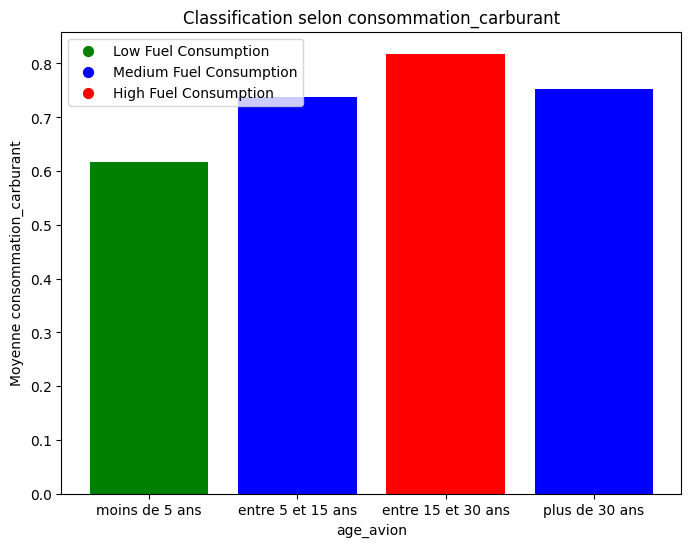

In [5]:
df_age['age_avion'] = 2023 - df_age['age_avion']
# Group number of passengers into categories
def group_age(age):
    if age <5:
        return 'moins de 5 ans'
    elif age >= 5 and age <15:
        return 'entre 5 et 15 ans'
    elif age >= 15 and age <= 30:
        return 'entre 15 et 30 ans'
    elif age > 30:
        return 'plus de 30 ans'
    else :
        print(age)

df_age['age_group'] = df_age['age_avion'].apply(group_age)

cat_order = ['moins de 5 ans', 'entre 5 et 15 ans', 'entre 15 et 30 ans', 'plus de 30 ans']
df_age['age_group'] = pd.Categorical(df_age['age_group'], categories=cat_order)

# Calculate mean fuel consumption for each passenger group
grouped_data = df_age.groupby('age_group')['consommation_carburant'].mean().reset_index()

# Perform k-means clustering on fuel consumption data
kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped_data[['consommation_carburant']])
labels = kmeans.labels_


colors = ['g', 'b', 'r']
# Assign each label to a color based on its rank (i.e., the label with the highest mean value gets the first color, etc.)
mean_values = grouped_data.groupby(labels)['consommation_carburant'].mean().sort_values()
color_map = {label: colors[i] for i, label in enumerate(mean_values.index)}
# Convert age_group column to a categorical variable and set the category order



# Sort the DataFrame by the age_group column
grouped_data = grouped_data.sort_values(by='age_group')

# Plot the results with bar color based on the cluster label
fig, ax = plt.subplots(figsize=(8, 6))
for i, label in enumerate(labels):
    color = color_map[label]
    ax.bar(grouped_data['age_group'][i], grouped_data['consommation_carburant'][i], color=color)

cluster_labels = ['Low Fuel Consumption', 'Medium Fuel Consumption', 'High Fuel Consumption']

legend_handles = [plt.scatter([], [], marker='o', s=50, c=color, label=label)
                 for label, color in zip(cluster_labels, colors)]
ax.legend(handles=legend_handles)
ax.set_xlabel('age_avion')
ax.set_ylabel('Moyenne '+'consommation_carburant')
ax.set_title('Classification selon '+'consommation_carburant')
plt.show()